In [249]:
import pandas as pd
import numpy as np

# Чтение данных

In [250]:
data = pd.read_csv('train.csv')
data.sample(n=5)  # посмотрим на 5 случайных строк

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
3385,26,75.00,1908.35,Male,0,No,No,Yes,No,DSL,Yes,No,No,Yes,Yes,Yes,One year,No,Bank transfer (automatic),0
303,72,19.85,1434.1,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),0
920,8,58.20,469.25,Female,0,No,No,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,No,Bank transfer (automatic),0
2278,71,79.10,5564.85,Male,0,Yes,No,Yes,No,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0
834,10,19.80,196.75,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),0


In [251]:
# название колонок для числовых и категориальных признаков

# числовые признаки
numerical_columns = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# категориальные признаки
catigorial_columns = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

# все признаки
feature_columns = numerical_columns + catigorial_columns

# целевой признак
target_column = 'Churn'

### Удалим все non'ы

Посмотрим есть ли незаполненные признаки (nan'ы)

In [252]:
data = data.replace('?', np.nan)
data = data.replace('', np.nan)
data = data.replace(' ', np.nan)

In [253]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Видно, что есть nun в колонке TotalSpent. Удалим эти строки с nan.

In [254]:
data = data.dropna()
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Посмотрим на типы данных

In [255]:
data.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                   object
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
Churn                         int64
dtype: object

Видно, что численные признак TotalSpent имеет тип object. Должно ли быть так?

In [256]:
data['TotalSpent'].head()

0    1026.35
1     1872.2
2       75.9
3       2570
4    6758.45
Name: TotalSpent, dtype: object

Очевидно тут числа, поэтому заменим поменяем тип с object на float

In [257]:
data['TotalSpent'] = data['TotalSpent'].astype(float)

# Анализ данных

In [258]:
from matplotlib import pyplot as plt
import seaborn as sns

### Гистограммы числовых признаков

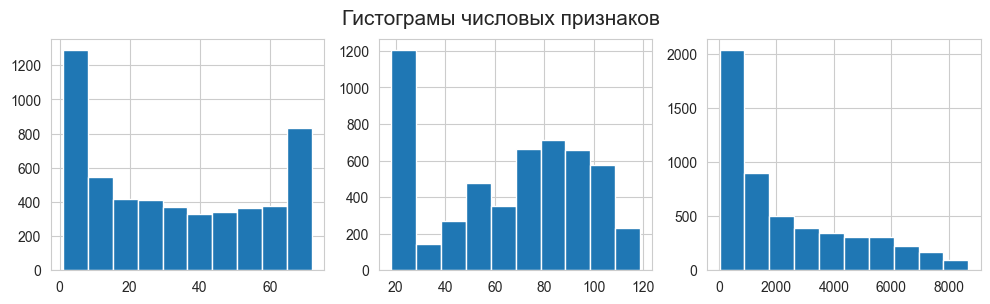

In [259]:
n = data[numerical_columns].shape[1]

fig, axes = plt.subplots(1, n, figsize=(12, 3))
fig.suptitle('Гистограмы числовых признаков', size=15)

for i in range(n):
    y = data[numerical_columns[i]]
    ax = axes[i]
    ax.hist(y, 10)
    # ax.add_title('Title')

### Количество каждого значения для каждого категориального признака

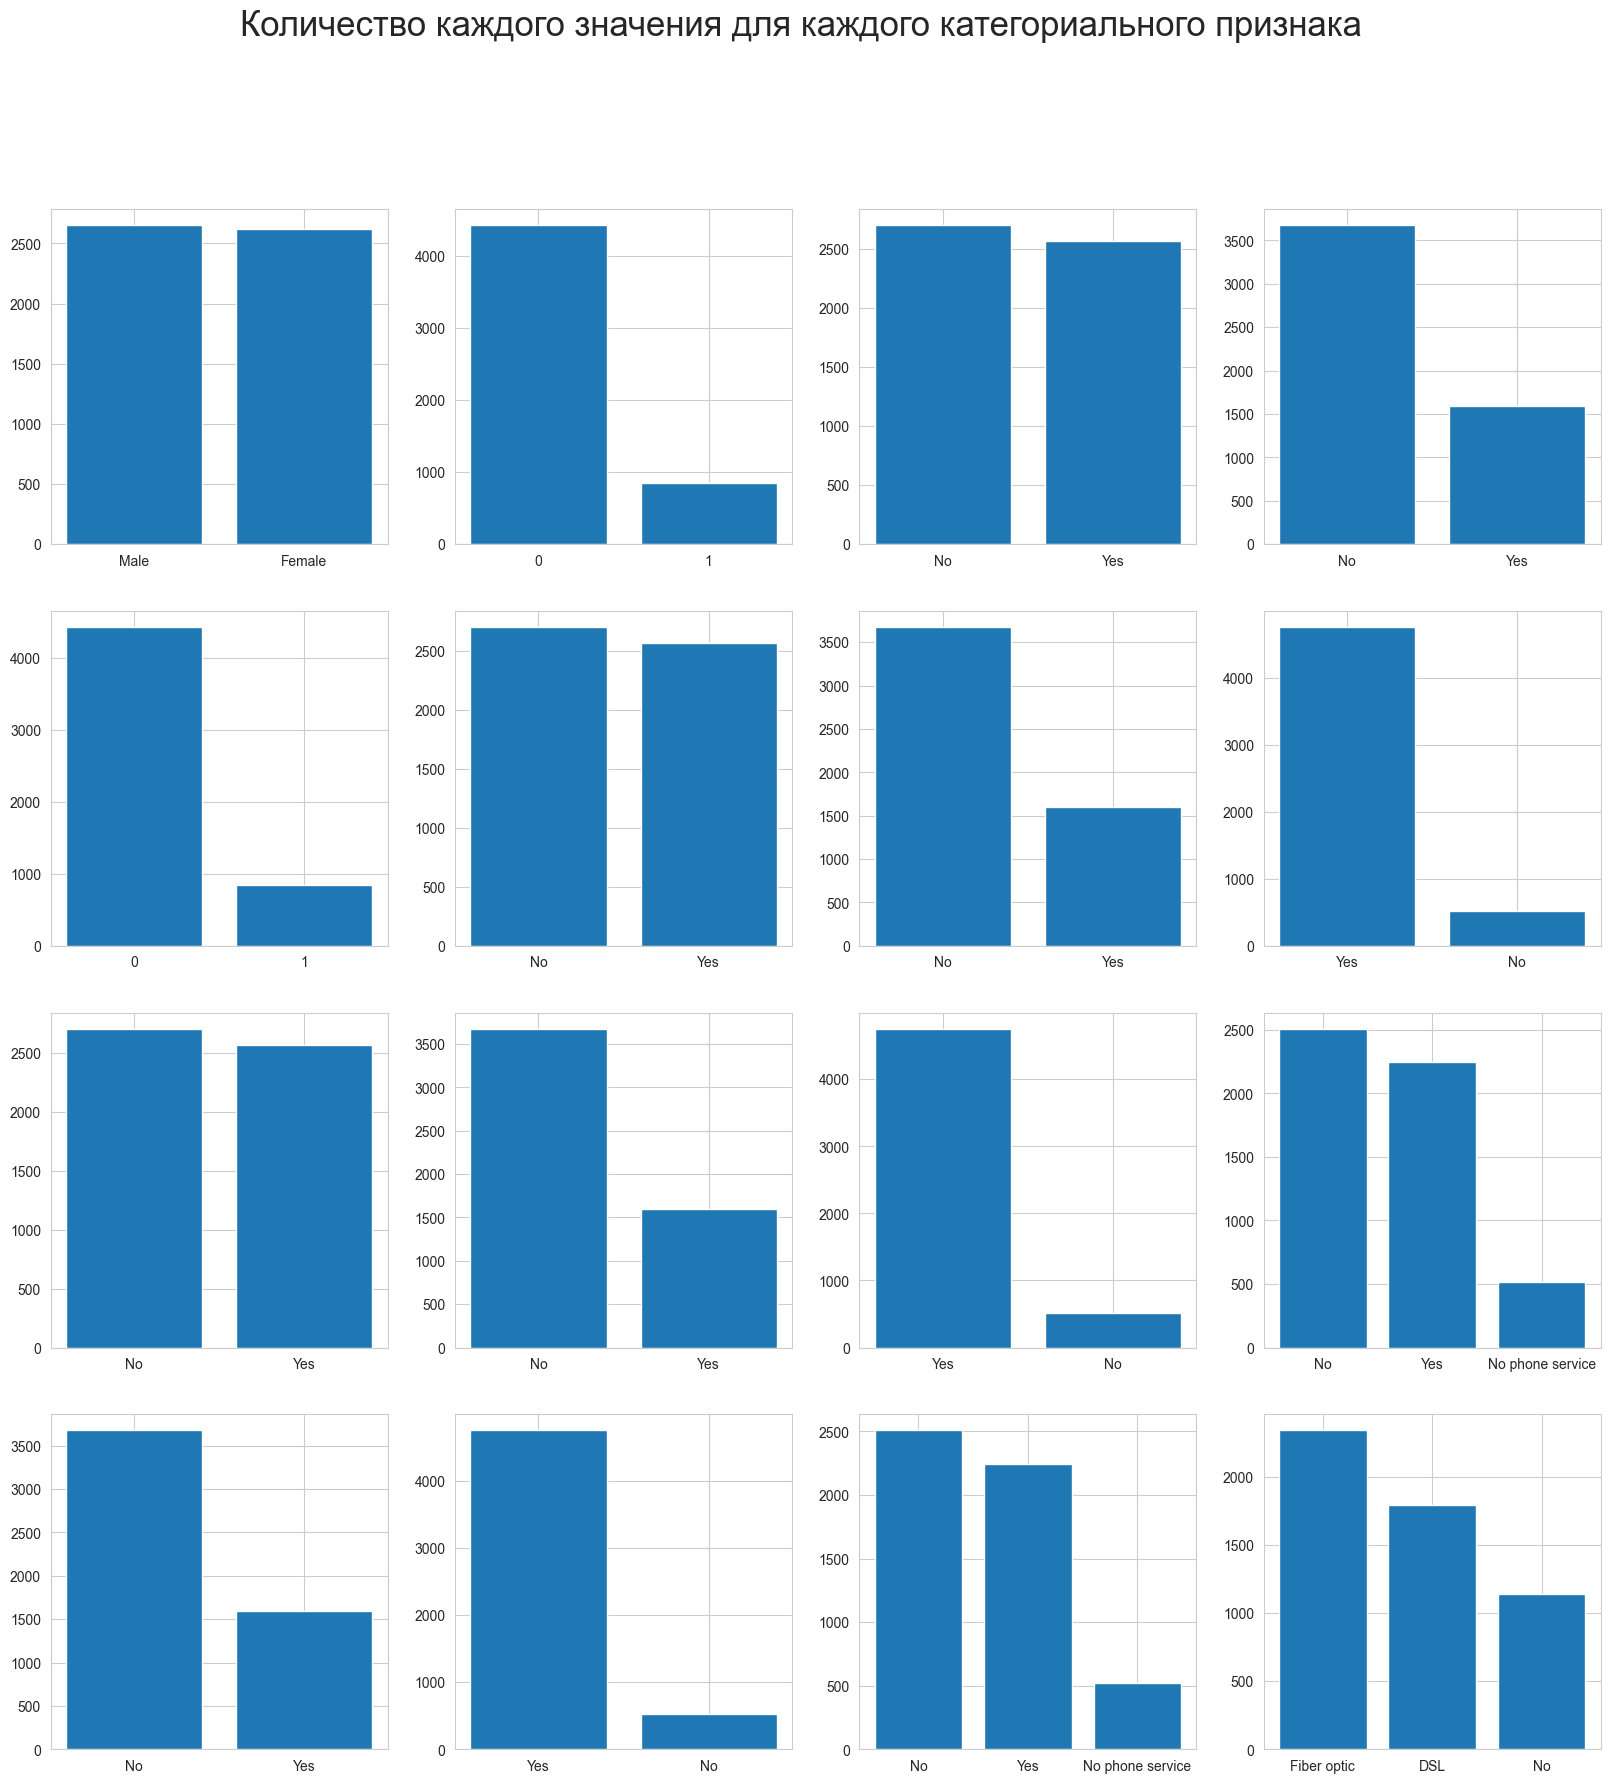

In [260]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
fig.suptitle('Количество каждого значения для каждого категориального признака', size=25)

for i in range(4):
    for j in range(4):
        this_data = data[catigorial_columns[i + j]].value_counts()
        ax = axes[i][j]
        ax.bar(this_data.index.values, this_data.values)
        ax.set_xticks(this_data.index.values)

### Распределение целевой переменной

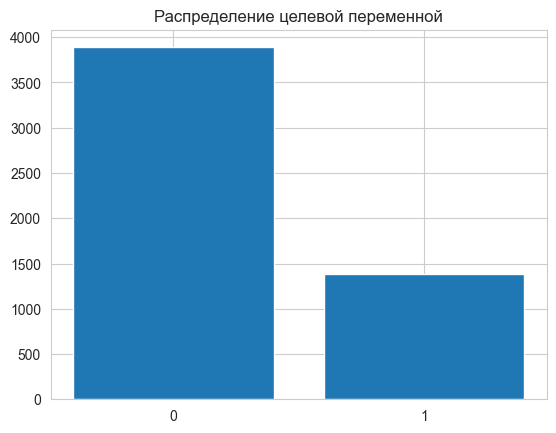

In [261]:
this_data = data[target_column].value_counts()
plt.bar(this_data.index.values, this_data.values)
plt.xticks(this_data.index.values)
plt.title('Распределение целевой переменной')
plt.show()

In [263]:
print(f'Количество объектов класса 0: {data[target_column].value_counts().values[0]}')
print(f'Количество объектов класса 1: {data[target_column].value_counts().values[1]}')
print()
print(f'Доля объектов класса 0: {round(100 * data[target_column].value_counts().values[0] / data[target_column].count(), 2)}%')
print(f'Доля объектов класса 1: {round(100 * data[target_column].value_counts().values[1] / data[target_column].count(), 2)}%')

Количество объектов класса 0: 3889
Количество объектов класса 1: 1384

Доля объектов класса 0: 73.75%
Доля объектов класса 1: 26.25%


Данное распределение НЕ является НЕ сбалансированным (если мы считаем, что несбалансированность начинается с соотношения 20 к 1)

# Применение линейных моделей

### Создание pipline

В задании сказано "Для one-hot-encoding'a **можно** испльзовать комбинацию LabelEncoder + OneHotEncoder"

Можно, но не обязательно. Я считаю это излишним, так что использовал только OneHotEncoder.

In [264]:
X = data.drop(columns=target_column)
y = data[target_column]

In [265]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

# препроцессор, который будет обрабатывать и числовые, и категориальные признаки
preprocessor = make_column_transformer(
    (StandardScaler(), numerical_columns),  # нормализация числовых значений
    (OneHotEncoder(), catigorial_columns)  # OneHotEncoder для категориальных признаков
)

# основной pipline
pipeline = make_pipeline(
    preprocessor,
    LogisticRegression()
)

pipeline.fit(X, y)
pipeline.score(X, y)

0.8056135027498578

### GridSearchCV

In [284]:
from sklearn.model_selection import GridSearchCV

In [294]:
param = {'logisticregression__C': [10000000 / 10 ** i for i in range(14)]}

linear_model = GridSearchCV(estimator=pipeline,
                            param_grid=param,
                            cv=30,
                            scoring='roc_auc',
                            n_jobs=-1)
linear_model.fit(X, y)
None

Посмотрим на то, как менялось значение ROC_AUC

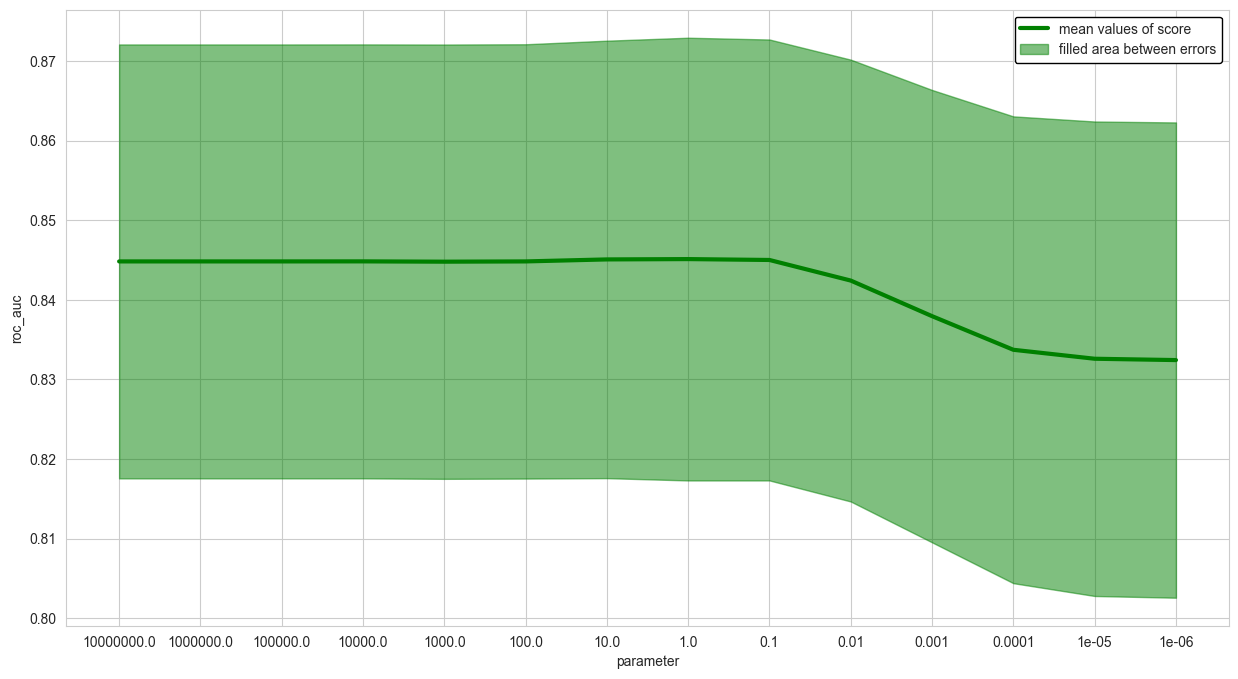

In [295]:
means = linear_model.cv_results_['mean_test_score']
error = linear_model.cv_results_['std_test_score']
grid = list(range(len(means)))
# grid = param['logisticregression__C']

plt.figure(figsize=(15, 8))

plt.plot(grid, means, label='mean values of score', color='green', lw=3)
plt.fill_between(grid, means - error, means + error, color='green', label='filled area between errors', alpha=0.5)

plt.xticks(grid, param['logisticregression__C'])

legend_box = plt.legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.xlabel('parameter')
plt.ylabel('roc_auc')
plt.show()

Лучшее значение C:

In [296]:
linear_model.best_params_

{'logisticregression__C': 1.0}

Запомним лучшую модель

In [297]:
best_linear_model = linear_model.best_estimator_

In [298]:
best_linear_roc_auc = linear_model.best_score_
best_linear_roc_auc

0.8451262110162138

# Градиентный бустинг

In [301]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(data[feature_columns],
                                                      data[target_column],
                                                      train_size=0.8,
                                                      random_state=42)

In [323]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

best_roc_auc_boosting = 0
best_n_estimators = None
best_learning_rate = None
best_boosting_model = None

for n_estimators in [100, 200, 300, None]: # None значит что catboost сам выберет параметры
    for learning_rate in [0.01, 0.05, 0.1, None]:

        # обучаем модель
        boosting_model = CatBoostClassifier(cat_features=catigorial_columns,
                                            n_estimators=n_estimators,
                                            learning_rate=learning_rate)
        boosting_model.fit(X_train, y_train)

        # смотрим ROC_AUC
        y_valid_pred = boosting_model.predict_proba(X_valid)[:, 1]
        roc_auc = roc_auc_score(y_valid, y_valid_pred)

        # храним лучший roc_auc и соответствующие ему параметры
        if roc_auc > best_roc_auc_boosting:
            best_roc_auc_boosting = roc_auc
            best_n_estimators = n_estimators
            best_learning_rate = learning_rate
            best_boosting_model = boosting_model

0:	learn: 0.6895586	total: 8.52ms	remaining: 844ms
1:	learn: 0.6859094	total: 10.4ms	remaining: 509ms
2:	learn: 0.6823067	total: 13.9ms	remaining: 449ms
3:	learn: 0.6787214	total: 18.9ms	remaining: 453ms
4:	learn: 0.6752959	total: 20.9ms	remaining: 397ms
5:	learn: 0.6717383	total: 22.5ms	remaining: 353ms
6:	learn: 0.6684145	total: 24.3ms	remaining: 323ms
7:	learn: 0.6649972	total: 26.1ms	remaining: 300ms
8:	learn: 0.6617482	total: 27.8ms	remaining: 281ms
9:	learn: 0.6585207	total: 29.5ms	remaining: 265ms
10:	learn: 0.6554130	total: 31.2ms	remaining: 252ms
11:	learn: 0.6523012	total: 32.7ms	remaining: 240ms
12:	learn: 0.6492308	total: 34.6ms	remaining: 232ms
13:	learn: 0.6461394	total: 36.5ms	remaining: 224ms
14:	learn: 0.6433825	total: 38.4ms	remaining: 217ms
15:	learn: 0.6404932	total: 40ms	remaining: 210ms
16:	learn: 0.6375941	total: 41.6ms	remaining: 203ms
17:	learn: 0.6348126	total: 44.7ms	remaining: 204ms
18:	learn: 0.6320367	total: 46.8ms	remaining: 199ms
19:	learn: 0.6295313	tot

In [324]:
print("Лучший параметр n_estimators:", best_boosting_model.get_params()['n_estimators'])
print("Лучший параметр learning_rate:", best_boosting_model.get_all_params()['learning_rate'])
print("ROC-AUC:", best_roc_auc_boosting)

Лучший параметр n_estimators: 100
Лучший параметр learning_rate: 0.1573459953069687
ROC-AUC: 0.844418494928049


# Выбор лучшей модели

In [325]:
if best_linear_roc_auc > best_roc_auc_boosting:
    best_model = best_linear_model
    print('Была выбрана линейная модель')
else:
    best_model = best_boosting_model
    print('Была выбрана модель с бустингом')

Была выбрана линейная модель


# Предсказание

In [340]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

X_test = X_test.replace('?', np.nan)
X_test = X_test.replace('', np.nan)
X_test = X_test.replace(' ', np.nan)
X_test = X_test.replace(np.nan, 0)
X_test['TotalSpent'] = X_test['TotalSpent'].astype(float)

best_model.predict_proba(X_test)

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)